# Importation des librairies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import urllib.request
import gzip
import os

plt.style.use('ggplot')

Matplotlib is building the font cache; this may take a moment.


# Chargement des données MNIST

Téléchargement du dataset MNIST via scikit-learn...
Téléchargement terminé!
Shapes des datasets:
Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


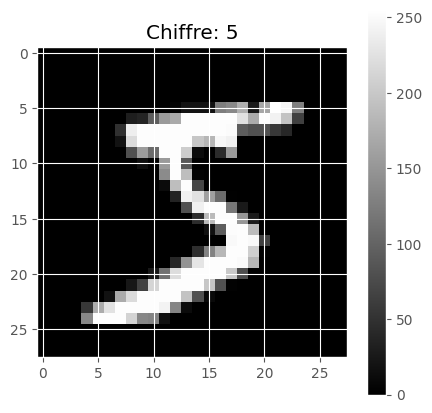

In [4]:
from sklearn.datasets import fetch_openml

def fetch_mnist_sklearn():
    print("Téléchargement du dataset MNIST via scikit-learn...")
    
    mnist = fetch_openml('mnist_784', version=1, parser='auto')
    X = mnist.data.astype('float32').values
    y = mnist.target.astype('int').values
    
    X = X.reshape(-1, 28, 28)
    
    train_images = X[:60000]
    train_labels = y[:60000]
    test_images = X[60000:]
    test_labels = y[60000:]
    
    print("Téléchargement terminé!")
    
    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = fetch_mnist_sklearn()

print("Shapes des datasets:")
print(f"Train images: {train_images.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}")
print(f"Test labels: {test_labels.shape}")

plt.figure(figsize=(5, 5))
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Chiffre: {train_labels[0]}")
plt.colorbar()
plt.show()

# Implémentation de la classe MNISTData

In [ ]:
class MNIST:
    def __init__(self, train_images, train_labels, test_images, test_labels):

        self.train_images = train_images
        self.train_labels = train_labels
        self.test_images = test_images
        self.test_labels = test_labels
        
        self.train_images_reshaped = self.train_images.reshape(self.train_images.shape[0], -1)
        self.test_images_reshaped = self.test_images.reshape(self.test_images.shape[0], -1)
        
        print("Shapes après reshape:")
        print(f"Train images: {self.train_images_reshaped.shape}")
        print(f"Test images: {self.test_images_reshaped.shape}")
    
    def display_stats(self):
        digit_counts = {"Digit": [], "Train": [], "Test": []}
        
        for digit in range(10):
            digit_counts["Digit"].append(digit)
            digit_counts["Train"].append(np.sum(self.train_labels == digit))
            digit_counts["Test"].append(np.sum(self.test_labels == digit))
        
        stats_df = pd.DataFrame(digit_counts)
        print("Distribution des chiffres:")
        print(stats_df)
        
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.barplot(x="Digit", y="Train", data=stats_df)
        plt.title("Distribution des chiffres dans l'ensemble d'entraînement")
        
        plt.subplot(1, 2, 2)
        sns.barplot(x="Digit", y="Test", data=stats_df)
        plt.title("Distribution des chiffres dans l'ensemble de test")
        
        plt.tight_layout()
        plt.show()
    
    def display_image(self, dataset="train", index=0):
        if dataset.lower() == "train":
            image = self.train_images[index]
            label = self.train_labels[index]
        else:
            image = self.test_images[index]
            label = self.test_labels[index]
            
        plt.figure(figsize=(5, 5))
        plt.imshow(image, cmap='gray')
        plt.title(f"Chiffre: {label}")
        plt.colorbar()
        plt.show()
    
    def display_digit_means(self):
        plt.figure(figsize=(15, 6))
        
        for digit in range(10):
            digit_images = self.train_images[self.train_labels == digit]
            
            mean_image = np.mean(digit_images, axis=0)
            
            plt.subplot(2, 5, digit + 1)
            plt.imshow(mean_image, cmap='gray')
            plt.title(f"Moyenne du {digit}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# Exploration des données MNIST

Shapes après reshape:
Train images: (60000, 784)
Test images: (10000, 784)
Distribution des chiffres:
   Digit  Train  Test
0      0   5923   980
1      1   6742  1135
2      2   5958  1032
3      3   6131  1010
4      4   5842   982
5      5   5421   892
6      6   5918   958
7      7   6265  1028
8      8   5851   974
9      9   5949  1009


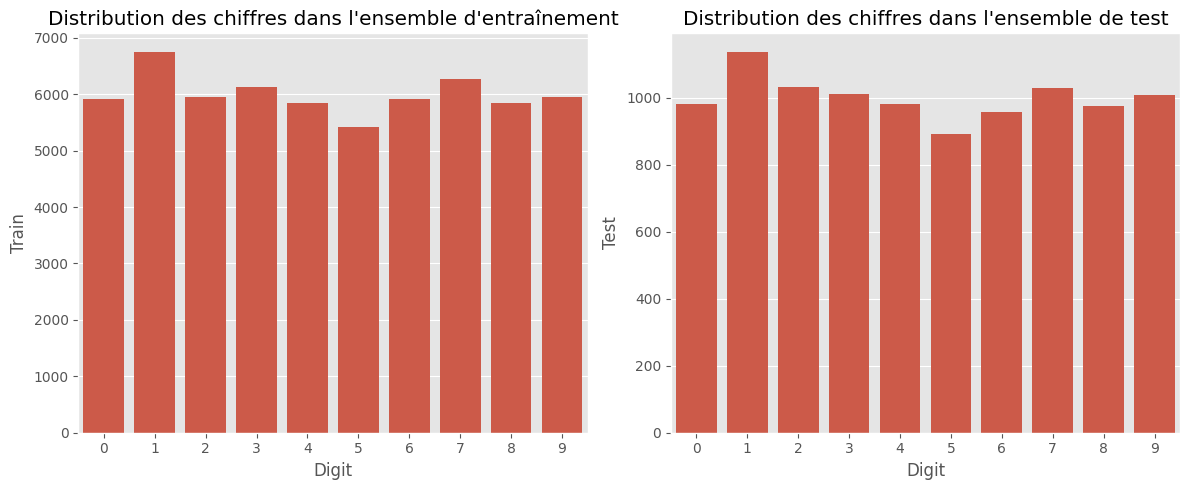

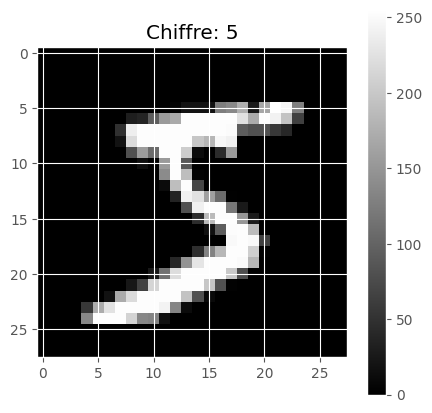

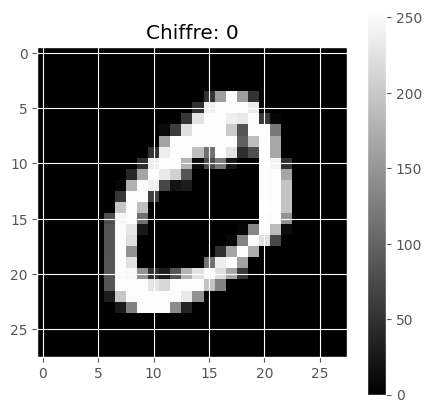

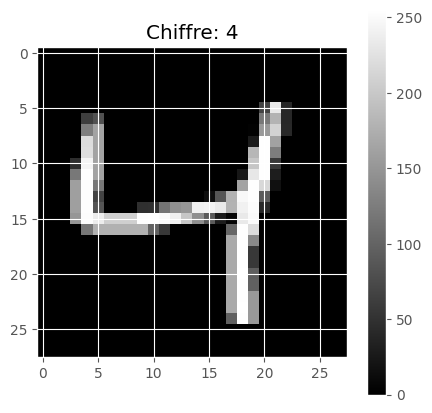

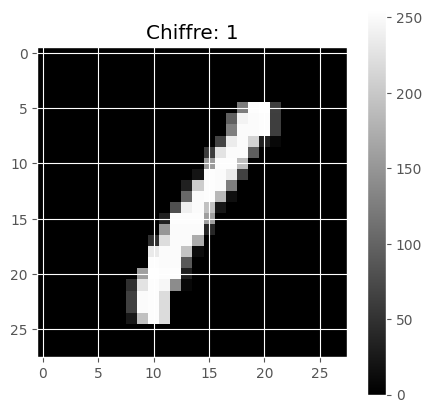

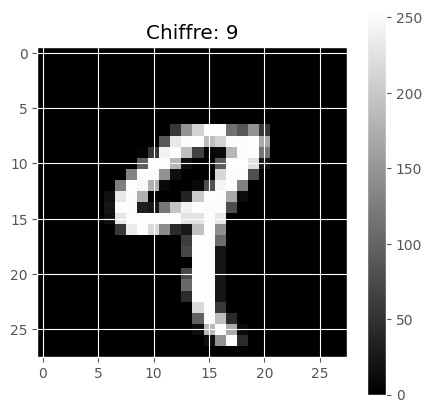

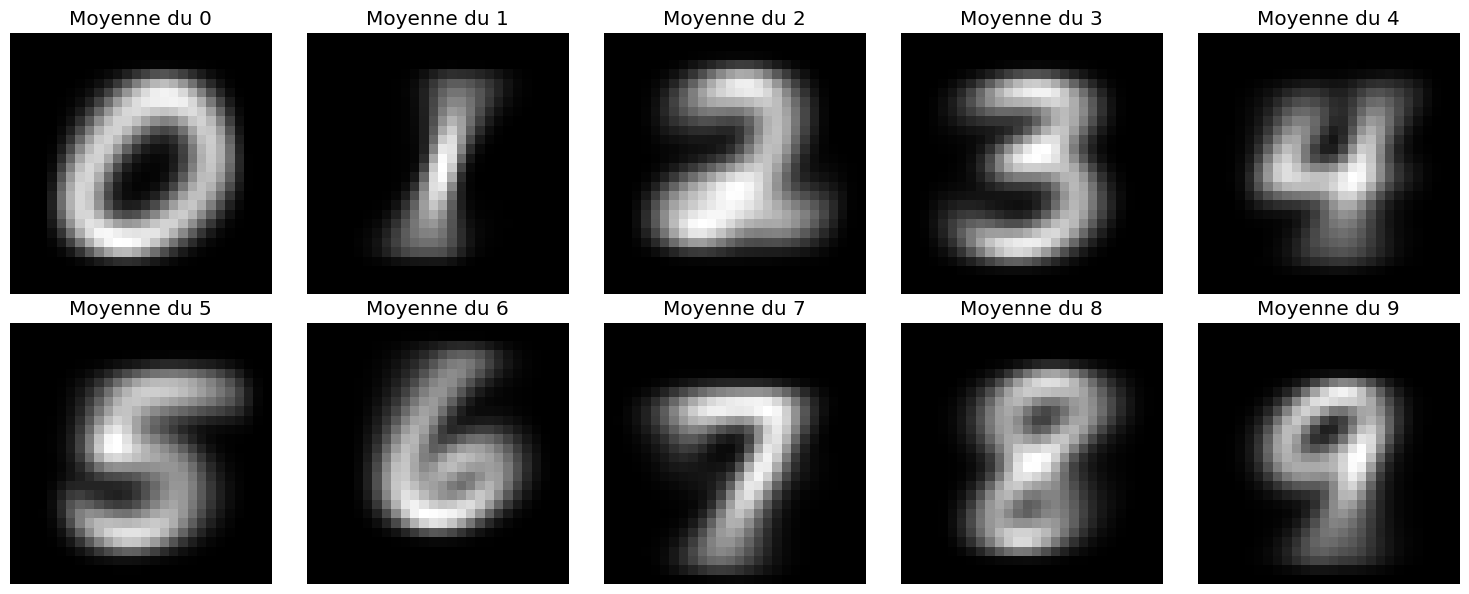

In [ ]:
mnist_data = MNIST(train_images, train_labels, test_images, test_labels)

mnist_data.display_stats()

for i in range(5):
    mnist_data.display_image("train", i)

mnist_data.display_digit_means()

# Préparation et normalisation des données

In [7]:
X_train = mnist_data.train_images_reshaped / 255.0
X_test = mnist_data.test_images_reshaped / 255.0
y_train = mnist_data.train_labels
y_test = mnist_data.test_labels

X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]
X_test_sample = X_test[:1000]
y_test_sample = y_test[:1000]

print(f"Nombre d'exemples d'entraînement: {X_train_sample.shape[0]}")
print(f"Nombre d'exemples de test: {X_test_sample.shape[0]}")

Nombre d'exemples d'entraînement: 10000
Nombre d'exemples de test: 1000


# Modélisation avec KNN

Entraînement du modèle KNN...
Accuracy: 0.9160


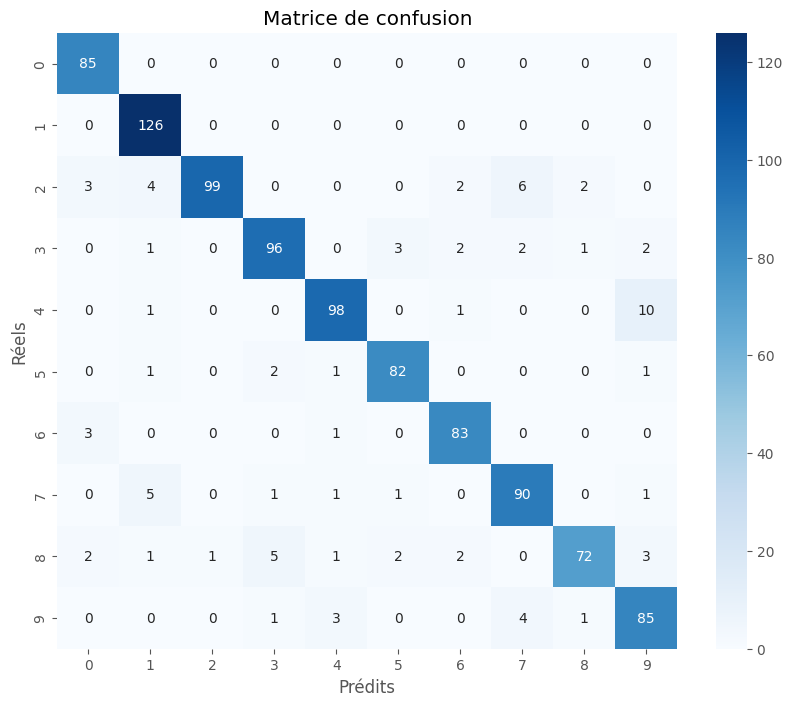

Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        85
           1       0.91      1.00      0.95       126
           2       0.99      0.85      0.92       116
           3       0.91      0.90      0.91       107
           4       0.93      0.89      0.91       110
           5       0.93      0.94      0.94        87
           6       0.92      0.95      0.94        87
           7       0.88      0.91      0.90        99
           8       0.95      0.81      0.87        89
           9       0.83      0.90      0.87        94

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [8]:
print("Entraînement du modèle KNN...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sample, y_train_sample)

y_pred = knn.predict(X_test_sample)

accuracy = accuracy_score(y_test_sample, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test_sample, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion')
plt.show()

print("Rapport de classification:")
print(classification_report(y_test_sample, y_pred))

# Visualisation des erreurs

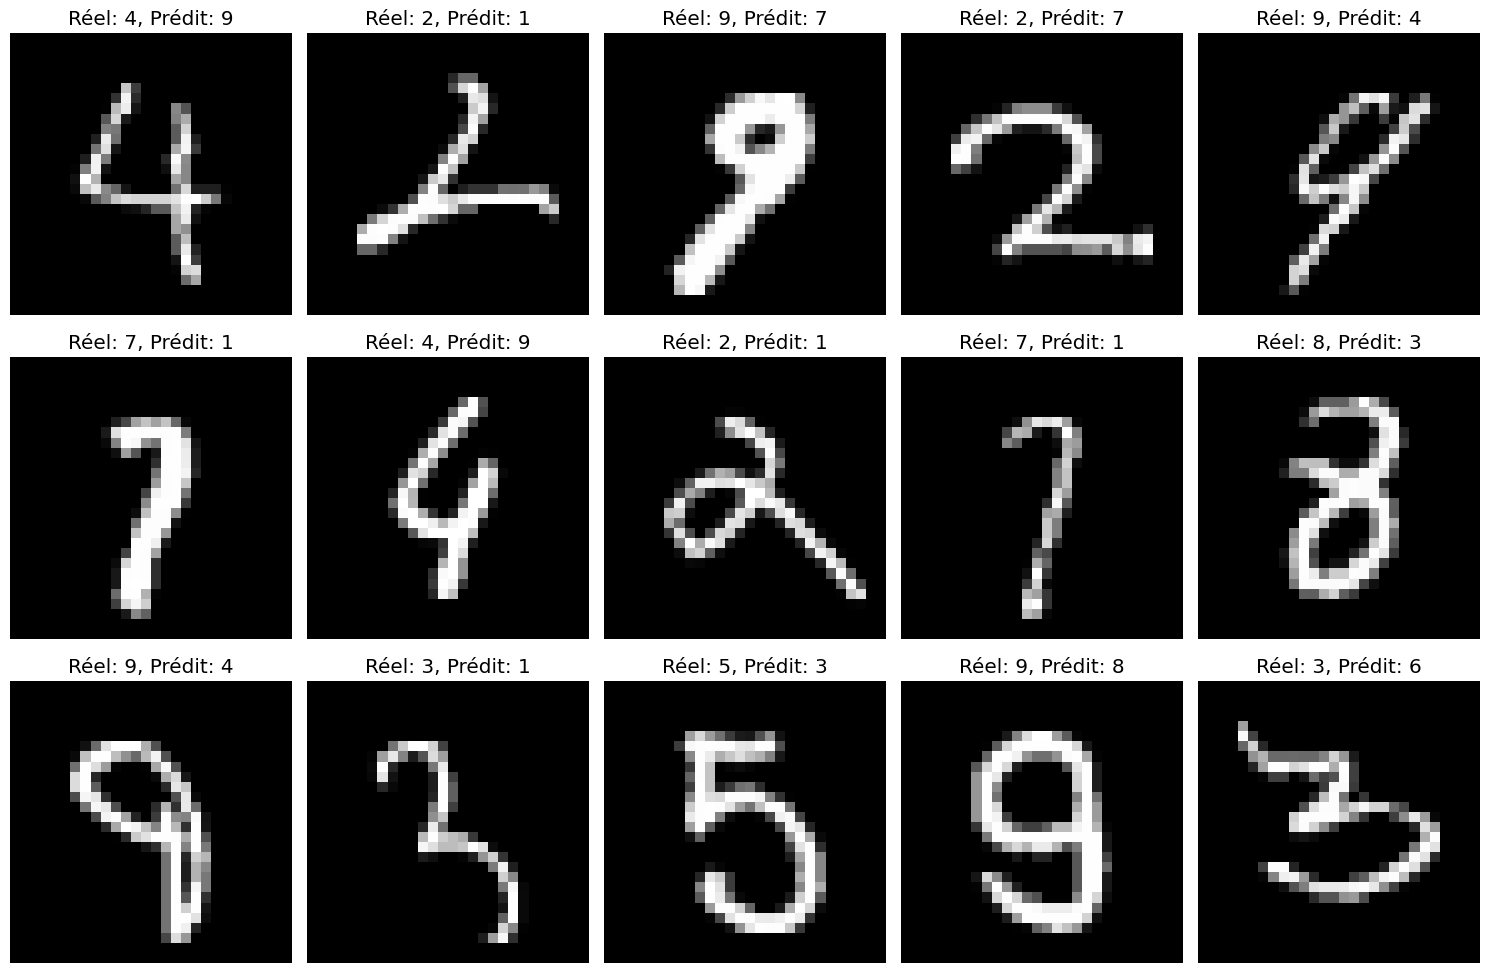

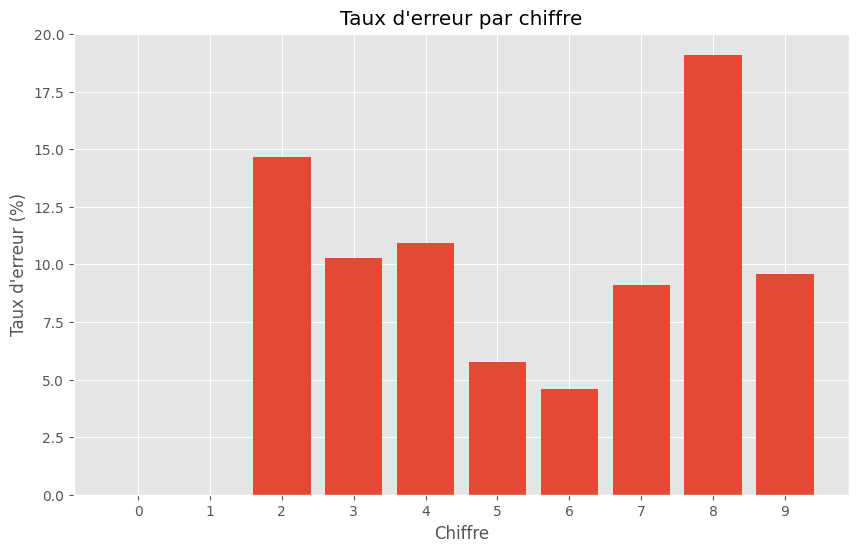

In [9]:
misclassified_indices = np.where(y_pred != y_test_sample)[0]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test_sample[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Réel: {y_test_sample[idx]}, Prédit: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

error_rates = {}
for digit in range(10):
    digit_indices = np.where(y_test_sample == digit)[0]
    if len(digit_indices) == 0:
        error_rates[digit] = 0
        continue
    
    digit_errors = np.sum(y_pred[digit_indices] != y_test_sample[digit_indices])
    error_rates[digit] = digit_errors / len(digit_indices) * 100

plt.figure(figsize=(10, 6))
plt.bar(error_rates.keys(), error_rates.values())
plt.xlabel('Chiffre')
plt.ylabel('Taux d\'erreur (%)')
plt.title('Taux d\'erreur par chiffre')
plt.xticks(range(10))
plt.show()

# Expérimentation avec permutation de pixels

In [10]:
np.random.seed(42)
perm_indices = np.random.permutation(784)

X_train_perm = X_train_sample[:, perm_indices]
X_test_perm = X_test_sample[:, perm_indices]

knn_perm = KNeighborsClassifier(n_neighbors=5)
knn_perm.fit(X_train_perm, y_train_sample)

y_pred_perm = knn_perm.predict(X_test_perm)
accuracy_perm = accuracy_score(y_test_sample, y_pred_perm)

print(f"Accuracy sans permutation: {accuracy:.4f}")
print(f"Accuracy avec permutation: {accuracy_perm:.4f}")
print(f"Différence: {(accuracy_perm - accuracy):.4f}")

Accuracy sans permutation: 0.9160
Accuracy avec permutation: 0.9160
Différence: 0.0000


# Validation croisée et optimisation

K=1, Accuracy moyen: 0.9393, Écart-type: 0.0073
K=3, Accuracy moyen: 0.9395, Écart-type: 0.0052
K=5, Accuracy moyen: 0.9377, Écart-type: 0.0065
K=7, Accuracy moyen: 0.9360, Écart-type: 0.0070
K=9, Accuracy moyen: 0.9345, Écart-type: 0.0069


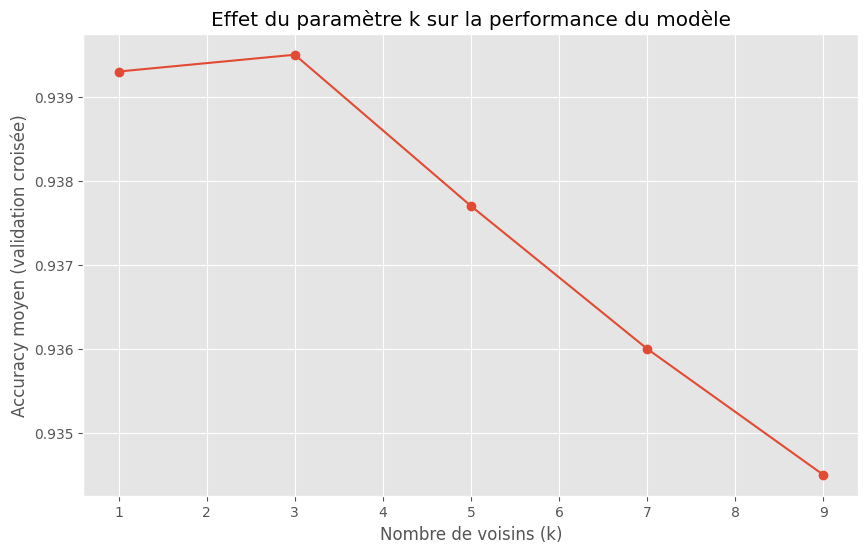

In [11]:
k_values = [1, 3, 5, 7, 9]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_sample, y_train_sample, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))
    print(f"K={k}, Accuracy moyen: {np.mean(scores):.4f}, Écart-type: {np.std(scores):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, 'o-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Accuracy moyen (validation croisée)')
plt.title('Effet du paramètre k sur la performance du modèle')
plt.grid(True)
plt.show()

# Q&A Zoidberg

1. Pourquoi utiliser un dataset séparé pour mesurer la performance d'un algorithme?
   - Pour éviter le surapprentissage (overfitting) et avoir une évaluation non biaisée des performances
   - Les données d'entraînement ont déjà été vues par le modèle, donc obtenir une performance sur ces données
     ne reflète pas la capacité de généralisation du modèle à des données nouvelles
   - Sur les données d'entraînement, la performance est généralement plus élevée que sur des données non vues

2. Qu'est-ce que le biais et la variance?
   - Le biais (bias) est l'erreur due à des hypothèses simplificatrices dans l'algorithme d'apprentissage
     Un biais élevé conduit à un sous-apprentissage (underfitting)
   - La variance est l'erreur due à la sensibilité aux petites fluctuations dans l'ensemble d'apprentissage
     Une variance élevée conduit à un surapprentissage (overfitting)
   - L'objectif est de trouver un équilibre entre biais et variance

3. Qu'est-ce que la validation croisée?
   - Technique qui divise les données en plusieurs sous-ensembles pour entraîner et tester le modèle
     plusieurs fois sur différentes combinaisons de ces sous-ensembles
   - Avantages: utilisation efficace des données, estimation plus robuste de la performance
   - Utilisable quand on a peu de données ou pour sélectionner les meilleurs hyperparamètres du modèle

4. Pourquoi normaliser les données pour KNN?
   - KNN utilise la distance entre points pour classer, donc les variables avec de grandes valeurs
     domineraient les calculs de distance si on ne normalisait pas
   - Pour MNIST, toutes les valeurs de pixels sont déjà sur la même échelle (0-255), mais la normalisation
     aide à améliorer la convergence et la performance du modèle

5. L'ordre des pixels importe-t-il après le reshape?
   - Pour KNN, l'ordre des pixels doit être le même pour toutes les images, car l'algorithme se base sur
     la distance euclidienne entre pixels correspondants
   - Si on permute les pixels de la même manière pour toutes les images, les distances relatives restent
     les mêmes et les performances de KNN ne changent pas
   - Pour les réseaux de neurones convolutifs, l'ordre est crucial car ils exploitent la structure spatiale des pixels

6. Quelles métriques pour mesurer la performance?
   - Accuracy: proportion de prédictions correctes, simple mais peut être trompeuse si déséquilibre des classes
   - Precision: proportion des prédictions positives qui sont correctes
   - Recall: proportion des cas positifs réels qui sont correctement identifiés
   - F1-score: moyenne harmonique de la précision et du rappel

7. Cas où l'accuracy n'est pas pertinente:
   - Classification très déséquilibrée: ex. détection de fraude (99% négatifs, 1% positifs)
     → Un modèle qui prédit toujours "négatif" aurait 99% d'accuracy mais serait inutile
   - Métriques alternatives: précision, rappel, F1-score, AUC-ROC

8. Matrice de confusion:
   - Montre les erreurs spécifiques par classe
   - Ne montre pas directement les probabilités des prédictions ou le niveau de confiance